<a href="https://colab.research.google.com/github/gabriel-afd/Analise_Mercado_Games/blob/main/Projeto_An%C3%A1lise_Mercado_de_Games_PS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libs Necessárias

# Libs para Modelagem e Matrizez
import numpy as np
import pandas as pd

# Libs para anaálises gráficas
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Lib para ignorar avisos
import warnings

# Desabilitando avisos
warnings.filterwarnings('ignore')

Link para baixar os dados: [Dados Games PS4](https://www.kaggle.com/sidtwr/videogames-sales-dataset?datasetId=189386&sortBy=voteCount)

In [2]:
# Lendo os dados
baseDados = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')

# Verificando
baseDados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [3]:
#Dimensão

baseDados.shape

(1034, 9)

In [4]:
#Campos nulos

baseDados.isnull().sum() #Tem campos nulso no ano e produtora

,0
Game,0
Year,209
Genre,0
Publisher,209
North America,0
Europe,0
Japan,0
Rest of World,0
Global,0


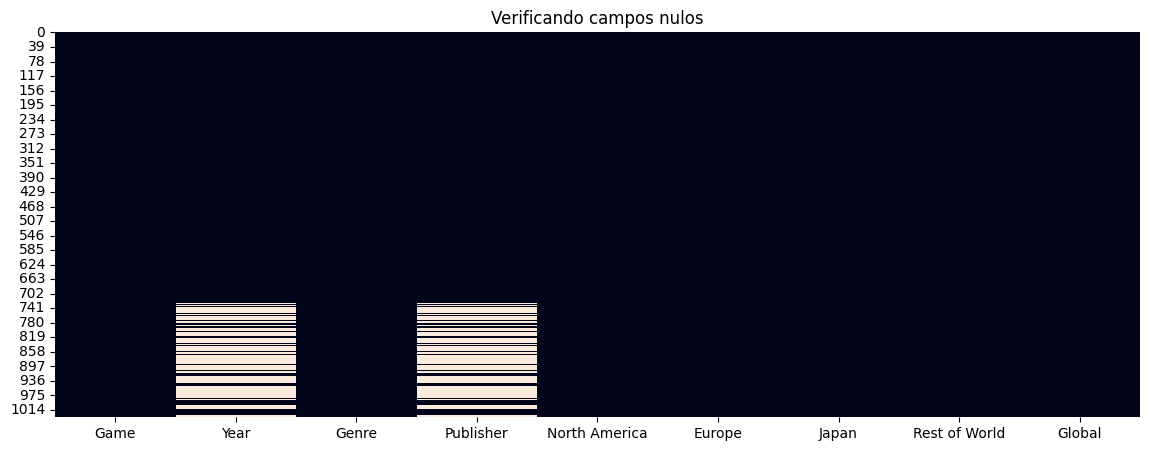

In [5]:
plt.figure(figsize=(14,5))
plt.title('Verificando campos nulos')
sns.heatmap(baseDados.isnull(), cbar=False);

In [6]:
#Retirando campos nulos

baseDados.dropna(inplace=True)

In [7]:
baseDados.isnull().sum()

,0
Game,0
Year,0
Genre,0
Publisher,0
North America,0
Europe,0
Japan,0
Rest of World,0
Global,0


In [8]:
#Estatisticas

baseDados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


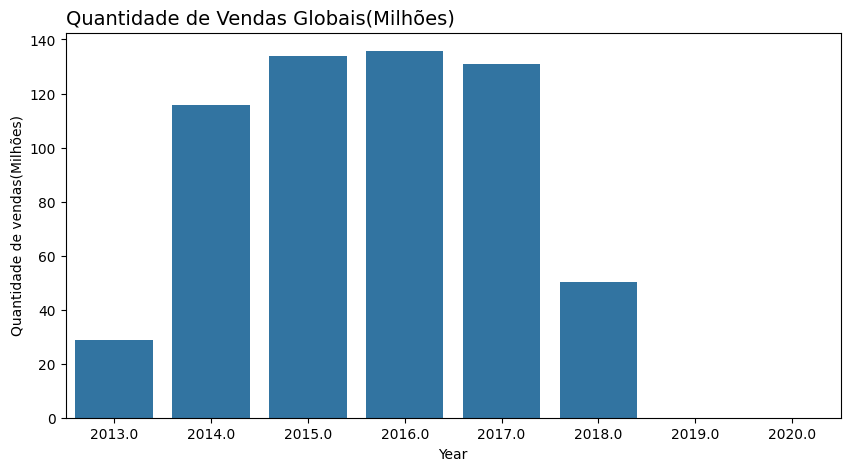

In [9]:
# Valor de vendas ao longo dos anos

#Tamanho da imagem
plt.figure(figsize=(10,5))
#Titulo
plt.title('Quantidade de Vendas Globais(Milhões)', loc='left', fontsize=14)
#Gráfico
sns.barplot(data=baseDados, x= 'Year', y= 'Global', ci=None, estimator = sum) #ci = None para tirar a barra do meio
#Label
plt.ylabel("Quantidade de vendas(Milhões)");

#O parâmetro estimator=sum na função sns.barplot() do Seaborn indica que os valores da variável especificada no eixo y (Global, no seu caso) serão somados para cada categoria única da variável no eixo x (Year).

#Caso não houvesse o estimator=sum, o barplot usaria a média por padrão.




In [10]:
#Retirnado 2019 e 2020

baseDados = baseDados.loc[(baseDados['Year'] !=2019) & (baseDados['Year'] !=2020)] #O comando loc permite o filtro na base de dados

baseDados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


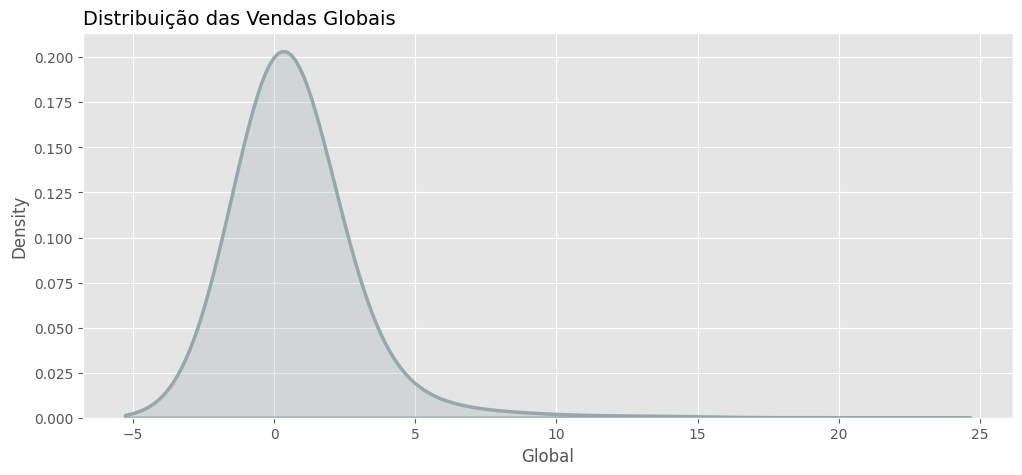

In [11]:
# Distribuição do valor global (avaliar concentração de vendas a partir de um gráfico de densidades)

#Tamanho
plt.figure(figsize=(12,5))

#Estilo
plt.style.use('ggplot')

#Titulo
plt.title('Distribuição das Vendas Globais',loc='left',fontsize=14)

sns.kdeplot(baseDados['Global'], shade=True, bw=1, color='#96a8a8', lw=2.5); #kdeplot faz um gráfico de densidade


Tem-se um evento simétrico, mas há valores que fogem muito da posição

In [12]:
#Análise por ano
baseDados.groupby(by=['Year']).sum()

,Game,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
Year,,,,,,,,
2013.0,Call of Duty: GhostsBattlefield 4FIFA Soccer 1...,ShooterShooterSportsAction-AdventureShooterRac...,ActivisionElectronic ArtsEA SportsUbisoftSony ...,10.35,12.88,0.97,4.57,28.76
2014.0,Grand Theft Auto VCall of Duty: Advanced Warfa...,ActionShooterAction-AdventureMiscSportsShooter...,Rockstar GamesActivisionSony Computer Entertai...,39.80,54.12,3.58,18.29,115.85
2015.0,Call of Duty: Black Ops 3Fallout 4FIFA 16Star ...,ShooterRole-PlayingSportsShooterActionRole-Pla...,ActivisionBethesda SoftworksEA SportsElectroni...,49.60,56.21,7.28,20.88,133.99
2016.0,FIFA 17Uncharted (PS4)Call of Duty: Infinite W...,SportsActionShooterShooterRole-PlayingShooterS...,Electronic ArtsSony Interactive EntertainmentA...,47.40,57.98,9.65,20.71,135.72
2017.0,Call of Duty: WWIIFIFA 18Horizon: Zero DawnCra...,ShooterSportsActionPlatformShooterShooterActio...,ActivisionEA SportsSony Interactive Entertainm...,44.77,57.18,9.08,19.89,130.90
2018.0,Red Dead Redemption 2Spider-Man (PS4)God of Wa...,Action-AdventureAction-AdventureActionActionAc...,Rockstar GamesSony Interactive EntertainmentSo...,19.65,18.70,4.13,7.69,50.20


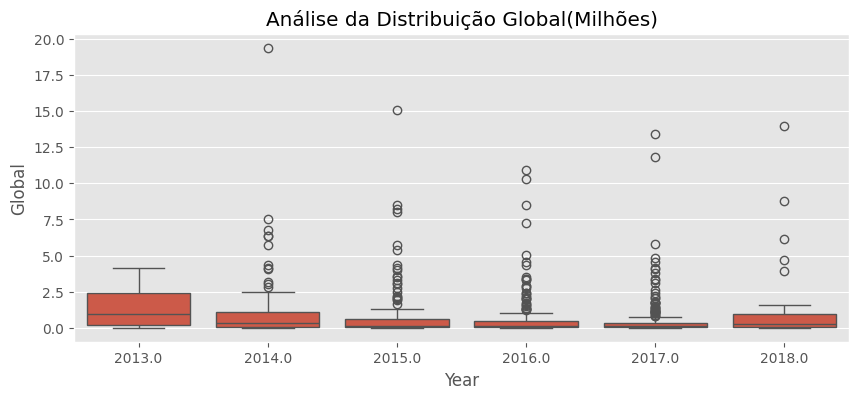

In [13]:
#Boxplot por ano

#Tamanho da imagem
plt.figure(figsize=(10,4))
plt.title('Análise da Distribuição Global(Milhões)')

sns.boxplot(data=baseDados, x= 'Year',y='Global');

Ao analisar a distribuição de densidade percebe-se que existem muitos outliers e é isso o boxplot mostra. Por ex, verifique que em 2014 em jogo vendeu quase 20 milhões de unidades, isso mostra que alguns games vendem muito mais do que outros

In [14]:
#Filtrando jogos que venderam mais de 10 milhões

baseDados.loc[baseDados['Global'] >= 10] #Percebam que o retorno será apenas 7 valores

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [15]:
baseDados

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [16]:
Analise = baseDados.groupby( by=['Year'] ).sum().reset_index()
Analise

,Year,Game,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,2013.0,Call of Duty: GhostsBattlefield 4FIFA Soccer 1...,ShooterShooterSportsAction-AdventureShooterRac...,ActivisionElectronic ArtsEA SportsUbisoftSony ...,10.35,12.88,0.97,4.57,28.76
1,2014.0,Grand Theft Auto VCall of Duty: Advanced Warfa...,ActionShooterAction-AdventureMiscSportsShooter...,Rockstar GamesActivisionSony Computer Entertai...,39.80,54.12,3.58,18.29,115.85
2,2015.0,Call of Duty: Black Ops 3Fallout 4FIFA 16Star ...,ShooterRole-PlayingSportsShooterActionRole-Pla...,ActivisionBethesda SoftworksEA SportsElectroni...,49.60,56.21,7.28,20.88,133.99
3,2016.0,FIFA 17Uncharted (PS4)Call of Duty: Infinite W...,SportsActionShooterShooterRole-PlayingShooterS...,Electronic ArtsSony Interactive EntertainmentA...,47.40,57.98,9.65,20.71,135.72
4,2017.0,Call of Duty: WWIIFIFA 18Horizon: Zero DawnCra...,ShooterSportsActionPlatformShooterShooterActio...,ActivisionEA SportsSony Interactive Entertainm...,44.77,57.18,9.08,19.89,130.90
5,2018.0,Red Dead Redemption 2Spider-Man (PS4)God of Wa...,Action-AdventureAction-AdventureActionActionAc...,Rockstar GamesSony Interactive EntertainmentSo...,19.65,18.70,4.13,7.69,50.20


In [17]:
# Gráfico da porcentagem de cada continente em relação ao valor global para cada jogo

# Dividindo [Continente/Total] * 100 para analisar a proporção de cada continente comparado ao total

# A função zip() em Python combina elementos de duas ou mais listas (ou iteráveis) em pares ou tuplas. No seu caso, zip(Analise['North America'], Analise['Global']) pega os valores correspondentes dessas duas colunas do DataFrame Analise e os emparelha, ex: [(50,200),(30,150)]
America = [(America / Total) * 100 for America, Total in zip(Analise['North America'], Analise['Global'])]

Europa = [(America / Total) * 100 for America, Total in zip(Analise['Europe'], Analise['Global'])]
Japao = [(America / Total) * 100 for America, Total in zip(Analise['Japan'], Analise['Global'])]
Mundo = [(America / Total) * 100 for America, Total in zip(Analise['Rest of World'], Analise['Global'])]


America, Europa, Japao, Mundo

([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

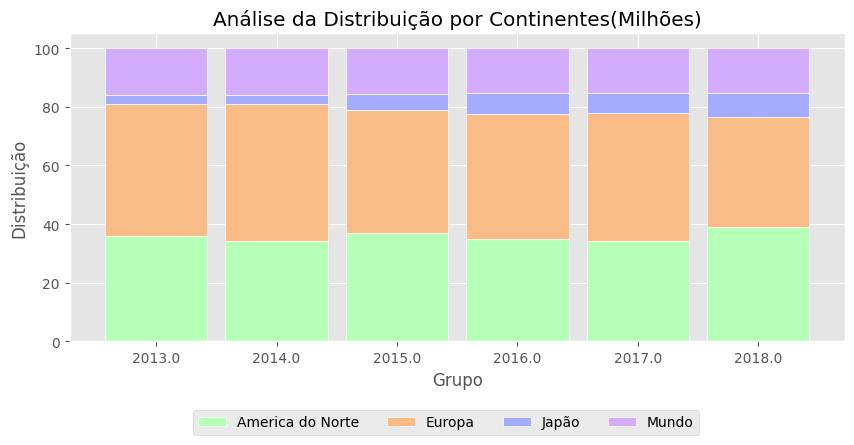

In [18]:
# Gráfico de barras empilhado

#Tamanho da imagem
plt.figure(figsize=(10,4))

#Largura da barra no gráfico
larguraBarra = 0.85

#Rotulos
Rotulos = Analise['Year']
Grupos = [0,1,2,3,4,5]

#Titulo
plt.title('Análise da Distribuição por Continentes(Milhões)')

#Plot da América com relação ao total
plt.bar(Grupos, America, width = larguraBarra, color='#b5ffb9', edgecolor='white')

#Plot da Europa com relação ao total
plt.bar(Grupos, Europa, bottom = America, width = larguraBarra, color='#f9bc86', edgecolor='white') #bottom = America para que o gráfico de barras da América fique sobreposto

#Plot da Japao com relação ao total
plt.bar( Grupos, Japao, bottom=[ A + B for A, B in zip(America, Europa) ], width=larguraBarra, color='#a3acff', edgecolor='white')

#Plot do Resto do Mundo com relação ao total
plt.bar( Grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao) ], width=larguraBarra, color='#d3acfe', edgecolor='white')

# Labels
plt.xticks(Grupos, Rotulos); #Substituir grupos pelos rotulos
plt.xlabel('Grupo')
plt.ylabel('Distribuição')

#Legenda
plt.legend(['America do Norte','Europa','Japão','Mundo'], loc='upper left', bbox_to_anchor=(0.15,-0.2), ncol = 4);

In [19]:
baseDados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [20]:
#Empresas que publicaram os games

baseDados['Publisher'].unique()

array(['Rockstar Games', 'Activision', 'EA Sports', 'Electronic Arts',
       'Sony Interactive Entertainment', 'Bethesda Softworks',
       'Sony Computer Entertainment', 'Namco Bandai Games', 'Square Enix',
       'Capcom', 'Blizzard Entertainment', 'Ubisoft',
       'Warner Bros. Interactive', '2K Sports',
       'Warner Bros. Interactive Entertainment',
       'Konami Digital Entertainment', '2K Games', 'Hello Games',
       '505 Games', 'Deep Silver', 'Take-Two Interactive',
       'Bandai Namco Games', 'Sega', 'Tecmo Koei', 'Gearbox Software',
       'Mojang', 'Disney Interactive Studios', 'Focus Home Interactive',
       'Studio Wildcard', 'Codemasters', 'Koch Media',
       'Harmonix Music Systems', 'Rebellion Developments', 'Gun Media',
       'Telltale Games', 'Kalypso Media', 'City Interactive',
       'NIS America', 'Sold Out', 'Tripwire Interactive', 'PQube',
       'THQ Nordic', 'Milestone S.r.l.', 'Nordic Games', 'Astragon',
       'Koei Tecmo', 'Frontier Developments', 

In [21]:
#Convertendo dados de valoroes qualitativos para quantitativos

from sklearn.preprocessing import LabelEncoder

funcaoLabel = LabelEncoder()

#Criando nova coluna na base de dados para adiconar a cada publisher um valor numérico
baseDados['Produtor'] = funcaoLabel.fit_transform(baseDados['Publisher']) #Pega cada valor qualitativo e atribuito um valor quantitativo
baseDados['Genero'] = funcaoLabel.fit_transform(baseDados['Genre'])
baseDados['Jogo'] = funcaoLabel.fit_transform(baseDados['Game'])

baseDados.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtor,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39,107,0,273
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09,8,12,98
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94,107,1,521
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40,8,12,102
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80,40,14,222


In [22]:
paletaCores = sns.color_palette('Dark2',8)
paletaCores

[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
 (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
 (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
 (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
 (0.4, 0.6509803921568628, 0.11764705882352941),
 (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
 (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
 (0.4, 0.4, 0.4)]

<Axes: title={'center': 'Análise dos produtores de game(Milhões)'}, xlabel='Produtor', ylabel='Global'>

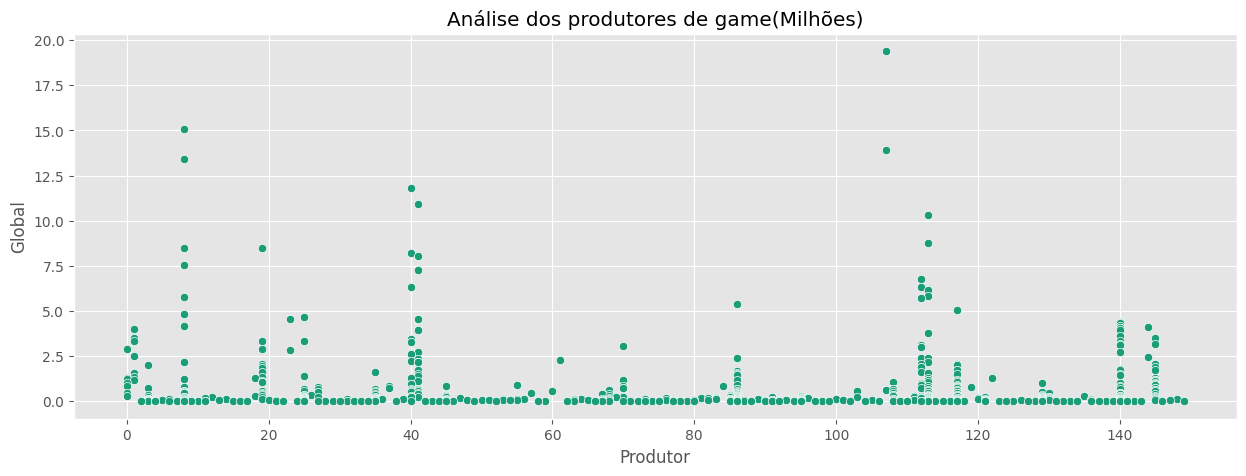

In [23]:
#Análise dos produtores de game

plt.figure(figsize=(15,5))
plt.title('Análise dos produtores de game(Milhões)')
sns.scatterplot(data=baseDados, x='Produtor',y = 'Global', color = paletaCores[0])

Perceba os outliers da Rockstar

<Axes: title={'center': 'Análise dos produtores de game(Milhões)'}, xlabel='Genero', ylabel='Global'>

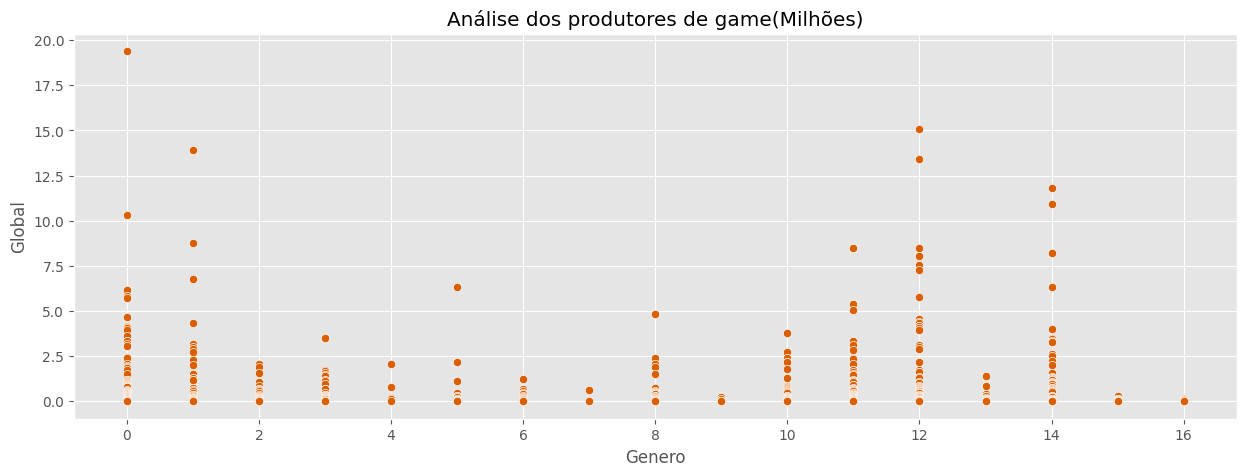

In [24]:
#Análise dos generos de game

plt.figure(figsize=(15,5))
plt.title('Análise dos produtores de game(Milhões)')
sns.scatterplot(data=baseDados, x='Genero',y = 'Global', color = paletaCores[1])

Perceba que os generos mais vendidos foram 0,1, 12 e 14

<Axes: title={'center': 'Análise dos produtores de game(Milhões)'}, xlabel='Jogo', ylabel='Global'>

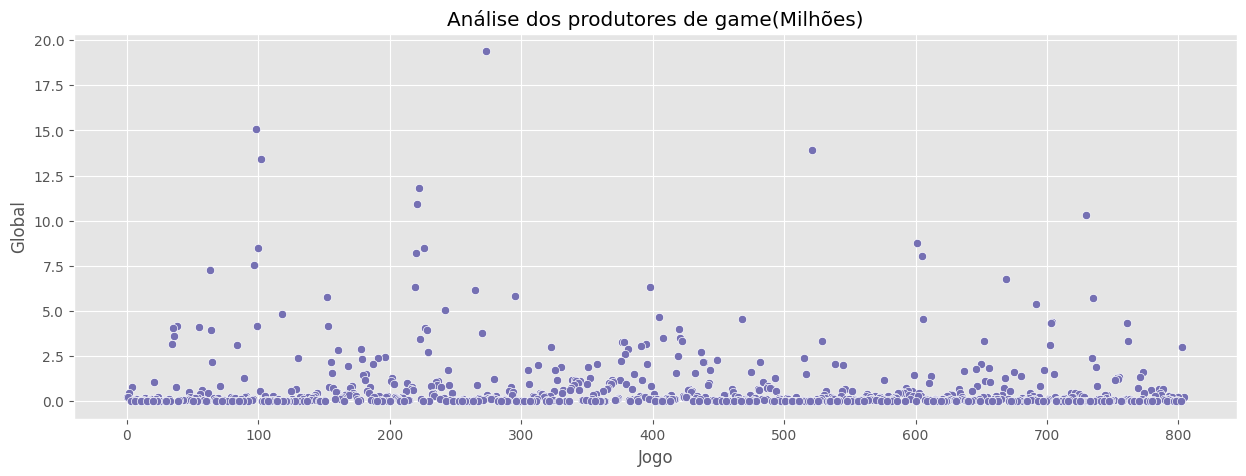

In [25]:
#Análise dos games

plt.figure(figsize=(15,5))
plt.title('Análise dos produtores de game(Milhões)')
sns.scatterplot(data=baseDados, x='Jogo',y = 'Global', color = paletaCores[2])

Perceba que GTA foi o jogo mais vendido em todo o Globo no periodo considerado

Text(0.5, -0.05, '\nEsse relatório foi elaborado por Gabriel Medeiros de Mendonça\n')

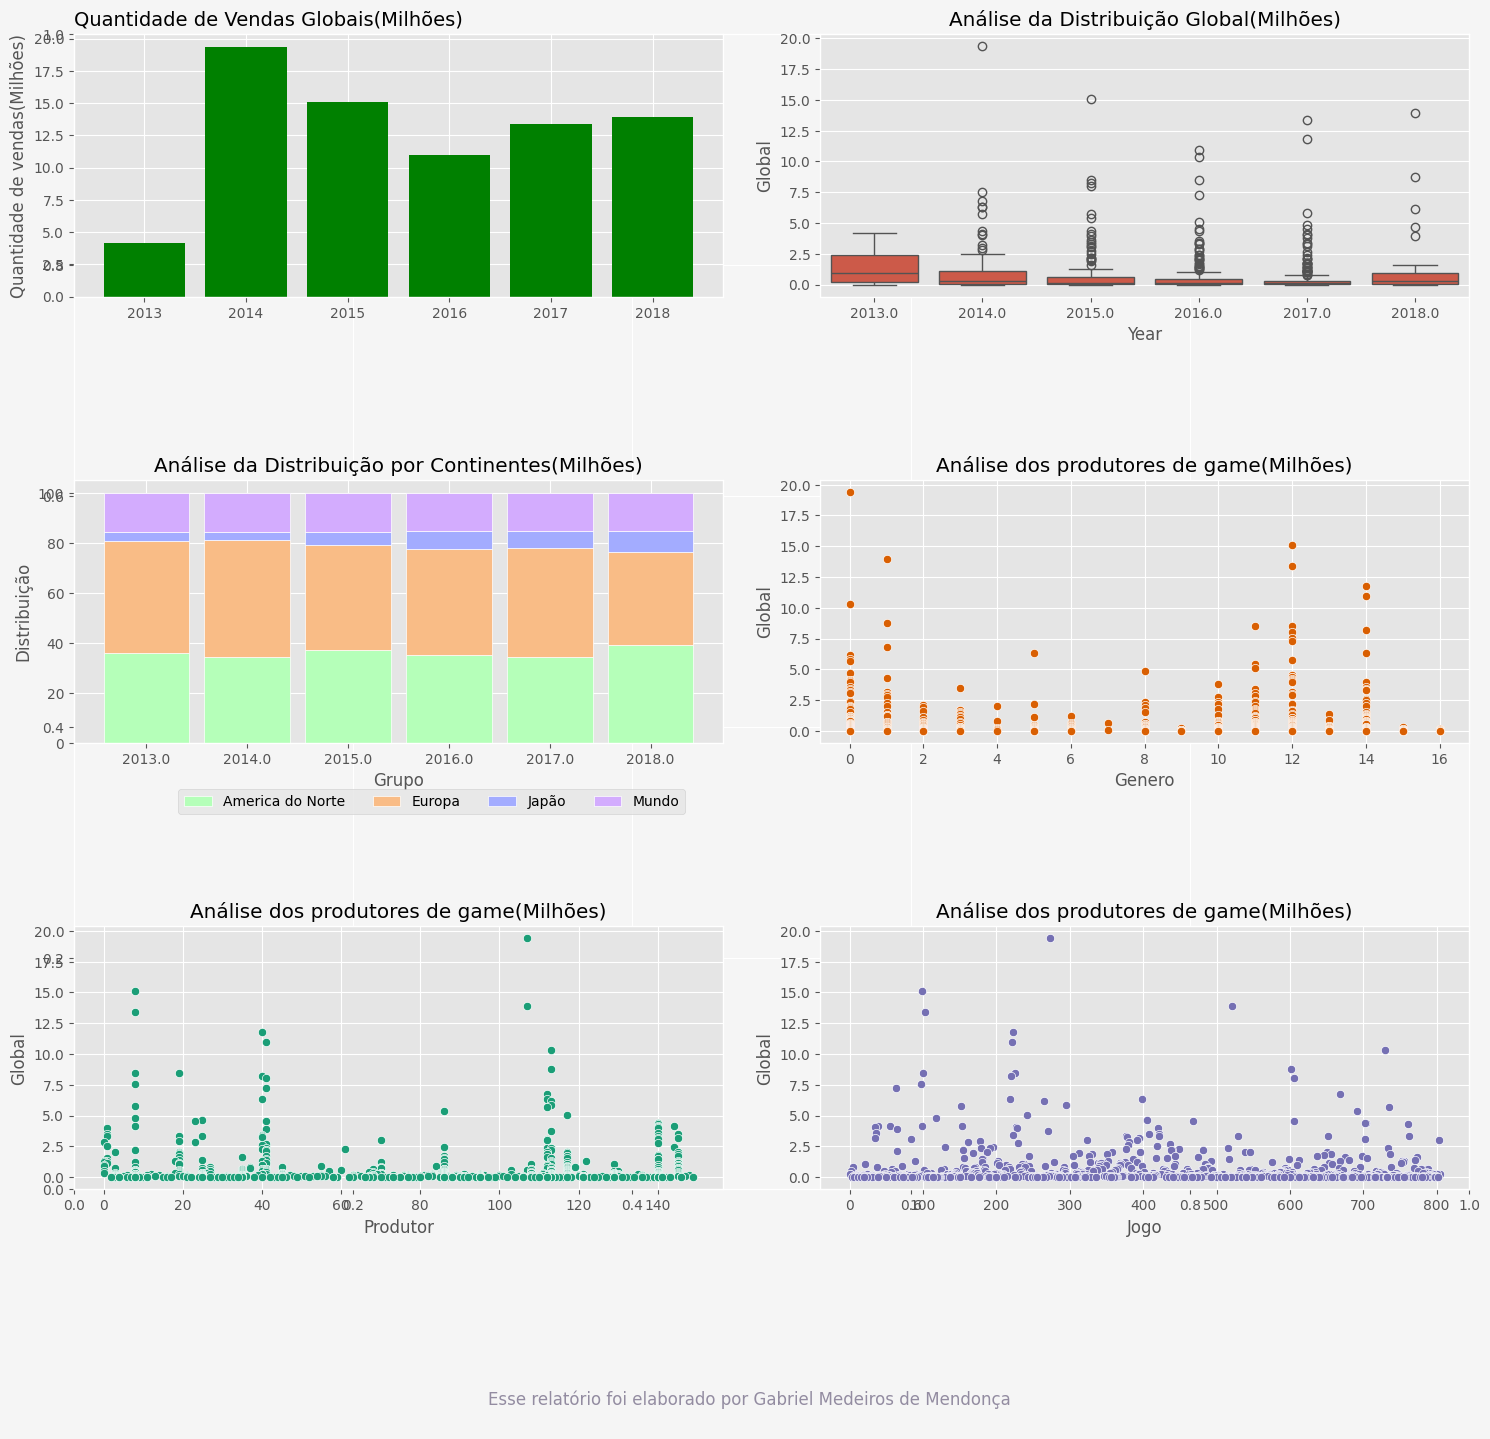

In [26]:
# Relatorio para o chefe

#Tamanho da imagem
fig, ax = plt.subplots(figsize=(18,15))

#Cor de fundo
corFundo = '#f5f5f5'
ax.set_facecolor(corFundo)
fig.set_facecolor(corFundo)

#Estilo dos gráficos
plt.style.use('ggplot')

#Estilo dos gráficos
Linhas = 3
Colunas = 2


#Acessando gráfico 1
plt.subplot(Linhas, Colunas,1) #subplot(nrows, ncols, index)

plt.title('Quantidade de Vendas Globais(Milhões)', loc='left', fontsize=14)
plt.bar(baseDados['Year'], baseDados['Global'], color='green')
plt.ylabel("Quantidade de vendas(Milhões)");


#Acessando gráfico 2
plt.subplot(Linhas, Colunas,2)

plt.title('Análise da Distribuição Global(Milhões)')
sns.boxplot(data=baseDados, x= 'Year',y='Global');

#Acessando gráfico 3
plt.subplot(Linhas, Colunas,3)

larguraBarra = 0.85
Rotulos = Analise['Year']
Grupos = [0,1,2,3,4,5]
plt.title('Análise da Distribuição por Continentes(Milhões)')
plt.bar(Grupos, America, width = larguraBarra, color='#b5ffb9', edgecolor='white')
plt.bar(Grupos, Europa, bottom = America, width = larguraBarra, color='#f9bc86', edgecolor='white') #bottom = America para que o gráfico de barras da América fique sobreposto
plt.bar( Grupos, Japao, bottom=[ A + B for A, B in zip(America, Europa) ], width=larguraBarra, color='#a3acff', edgecolor='white')
plt.bar( Grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japao) ], width=larguraBarra, color='#d3acfe', edgecolor='white')
plt.xticks(Grupos, Rotulos);
plt.xlabel('Grupo')
plt.ylabel('Distribuição')
plt.legend(['America do Norte','Europa','Japão','Mundo'], loc='upper left', bbox_to_anchor=(0.15,-0.15), ncol = 4);

#Acessando gráfico 4
plt.subplot(Linhas, Colunas,4)

plt.title('Análise dos produtores de game(Milhões)')
sns.scatterplot(data=baseDados, x='Genero',y = 'Global', color = paletaCores[1])

#Acessando gráfico 5
plt.subplot(Linhas, Colunas,5)

plt.title('Análise dos produtores de game(Milhões)')
sns.scatterplot(data=baseDados, x='Produtor',y = 'Global', color = paletaCores[0])

#Acessando gráfico 6
plt.subplot(Linhas, Colunas,6)

plt.title('Análise dos produtores de game(Milhões)',loc='center')
sns.scatterplot(data=baseDados, x='Jogo',y = 'Global', color = paletaCores[2])

#Ajustar o layout
plt.subplots_adjust(hspace=0.7,wspace=0.15) #Espaço de altura e largura entre os gráficos

#Rodapé
Rodape = '''
Esse relatório foi elaborado por Gabriel Medeiros de Mendonça
'''

#Incluíndo o rodapé no relatório
fig.text(0.5,-0.05, Rodape, ha='center', va='bottom',size=12,color='#938ca1')

In [27]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
